<a href="https://colab.research.google.com/github/minionpika/ESE-588-MachineLearningProjects/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

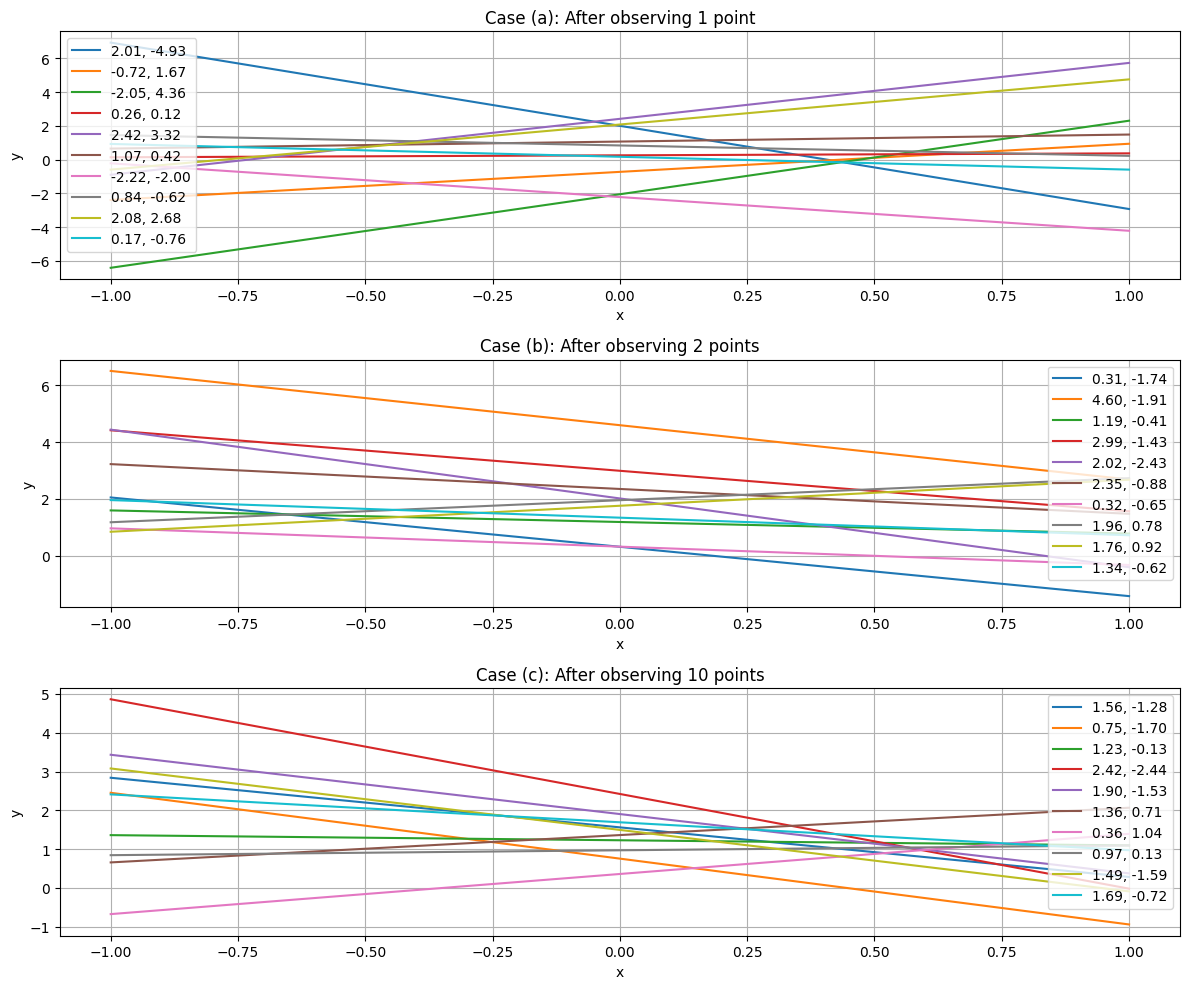

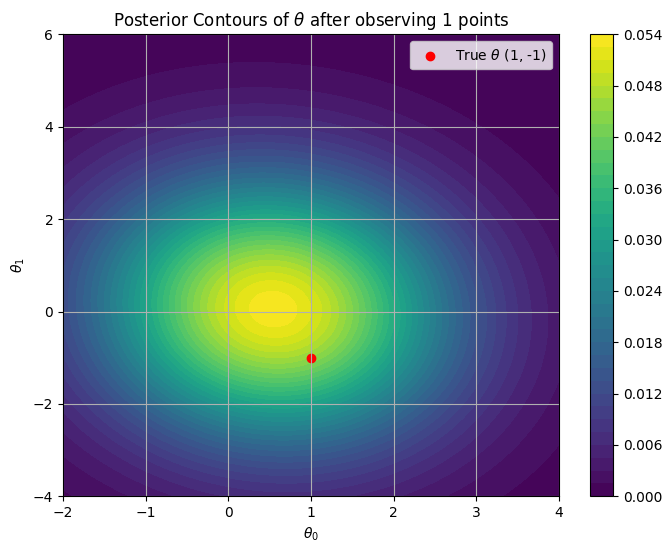

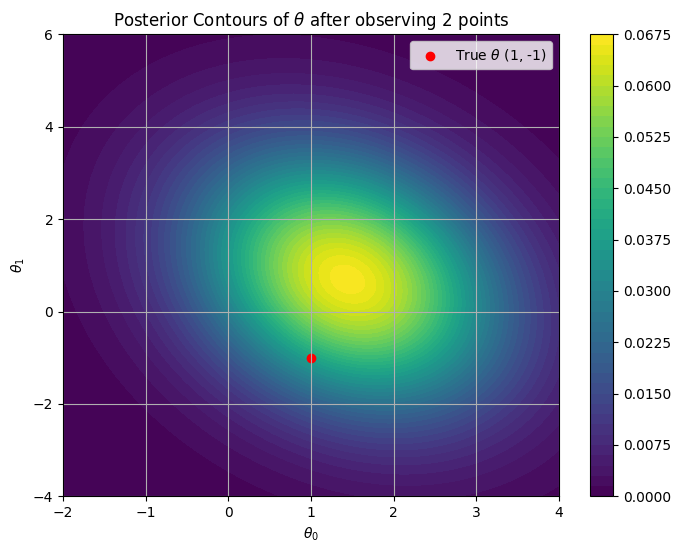

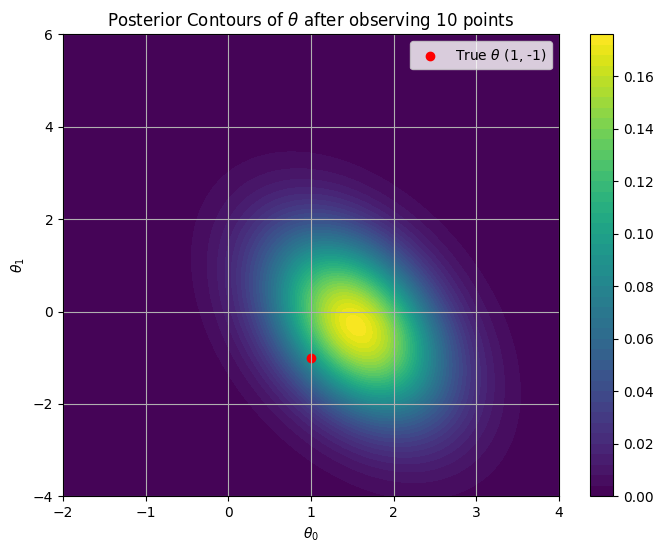

[-1.0000000e+00 -9.9000000e-01 -9.8000000e-01 -9.7000000e-01
 -9.6000000e-01 -9.5000000e-01 -9.4000000e-01 -9.3000000e-01
 -9.2000000e-01 -9.1000000e-01 -9.0000000e-01 -8.9000000e-01
 -8.8000000e-01 -8.7000000e-01 -8.6000000e-01 -8.5000000e-01
 -8.4000000e-01 -8.3000000e-01 -8.2000000e-01 -8.1000000e-01
 -8.0000000e-01 -7.9000000e-01 -7.8000000e-01 -7.7000000e-01
 -7.6000000e-01 -7.5000000e-01 -7.4000000e-01 -7.3000000e-01
 -7.2000000e-01 -7.1000000e-01 -7.0000000e-01 -6.9000000e-01
 -6.8000000e-01 -6.7000000e-01 -6.6000000e-01 -6.5000000e-01
 -6.4000000e-01 -6.3000000e-01 -6.2000000e-01 -6.1000000e-01
 -6.0000000e-01 -5.9000000e-01 -5.8000000e-01 -5.7000000e-01
 -5.6000000e-01 -5.5000000e-01 -5.4000000e-01 -5.3000000e-01
 -5.2000000e-01 -5.1000000e-01 -5.0000000e-01 -4.9000000e-01
 -4.8000000e-01 -4.7000000e-01 -4.6000000e-01 -4.5000000e-01
 -4.4000000e-01 -4.3000000e-01 -4.2000000e-01 -4.1000000e-01
 -4.0000000e-01 -3.9000000e-01 -3.8000000e-01 -3.7000000e-01
 -3.6000000e-01 -3.50000

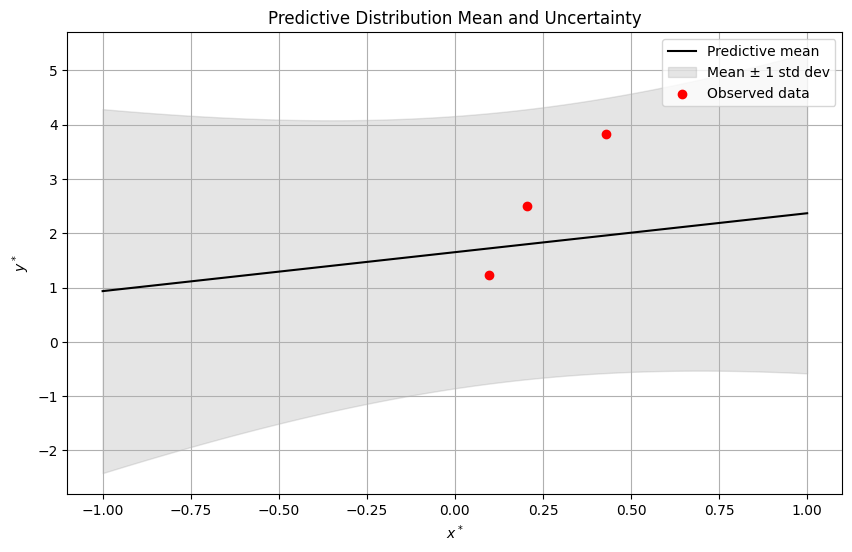

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters and synthetic data setup
n_samples = 10
theta0_true = 1
theta1_true = -1
sigma_eta2 = 5
sigma_theta2 = 4

# Generate synthetic data
np.random.seed(0)
xn = np.random.uniform(-1, 1, n_samples)
etan = np.random.normal(0, np.sqrt(sigma_eta2), n_samples)
yn = theta0_true + theta1_true * xn + etan

# Prior parameters
mu_0 = np.array([0, 0])
Sigma_0 = sigma_theta2 * np.eye(2)

# Function to update posterior
def update_posterior(X, y, Sigma_0, mu_0, sigma_eta2):
    Sigma_post_inv = np.linalg.inv(Sigma_0) + (1 / sigma_eta2) * X.T @ X
    Sigma_post = np.linalg.inv(Sigma_post_inv)
    mu_post = Sigma_post @ (np.linalg.inv(Sigma_0) @ mu_0 + (1 / sigma_eta2) * X.T @ y)
    return mu_post, Sigma_post

# Setup plot for line visualizations
plt.figure(figsize=(12, 10))
case_titles = ['Case (a): After observing 1 point',
               'Case (b): After observing 2 points',
               'Case (c): After observing 10 points']

# Plotting lines for each case
for i, n_points in enumerate([1, 2, 10]):
    plt.subplot(3, 1, i+1)  # 3 rows, 1 column, i-th plot
    X = np.vstack([np.ones(n_points), xn[:n_points]]).T
    y = yn[:n_points]
    mu_post, Sigma_post = update_posterior(X, y, Sigma_0, mu_0, sigma_eta2)

    # Draw 10 samples for line plots
    theta_samples = np.random.multivariate_normal(mu_post, Sigma_post, 10)
    x_range = np.linspace(-1, 1, 100)

    # Plot lines for each theta sample
    for theta in theta_samples:
        y_line = theta[0] + theta[1] * x_range
        plt.plot(x_range, y_line, label=f'{theta[0]:.2f}, {theta[1]:.2f}')

    plt.title(case_titles[i])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Ensure each contour plot is in its own figure
for i, n_points in enumerate([1, 2, 10]):
    X = np.vstack([np.ones(n_points), xn[:n_points]]).T
    y = yn[:n_points]
    mu_post, Sigma_post = update_posterior(X, y, Sigma_0, mu_0, sigma_eta2)

    # Contour plot of posterior
    theta0_range = np.linspace(-2, 4, 100)
    theta1_range = np.linspace(-4, 6, 100)
    Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range)

    # Compute posterior probability density for each point in the range
    posterior_pdf = multivariate_normal.pdf(np.dstack((Theta0, Theta1)), mean=mu_post, cov=Sigma_post)

    # Contour plot for updated posterior
    plt.figure(figsize=(8, 6))  # This ensures a new figure for each plot
    contour_1 = plt.contourf(Theta0, Theta1, posterior_pdf, 50, cmap='viridis')
    plt.colorbar(contour_1)
    plt.title('Posterior Contours of $\\theta$ after observing ' + str(n_points) + ' points')
    plt.xlabel('$\\theta_0$')
    plt.ylabel('$\\theta_1$')
    plt.scatter([theta0_true], [theta1_true], color='red', label='True $\\theta$ (1, -1)')  # Mark the true values
    plt.legend()
    plt.grid(True)
    plt.show()

# Update posterior using the first three observations
n_points = 3
X = np.vstack([np.ones(n_points), xn[:n_points]]).T
y = yn[:n_points]
mu_post, Sigma_post = update_posterior(X, y, Sigma_0, mu_0, sigma_eta2)

# Predictive distribution across new values x*
x_star = np.arange(-1, 1.01, .01)#np.linspace(-1, 1, 200)  # From -1 to 1 in steps of 0.01
print(x_star)
X_star = np.vstack([np.ones(x_star.shape[0]), x_star]).T
predictive_mean = X_star @ mu_post
predictive_var = np.sum(X_star @ Sigma_post * X_star, axis=1) + sigma_eta2  # Including noise variance

# Plot mean and one standard deviation bounds
predictive_std = np.sqrt(predictive_var)
plt.figure(figsize=(10, 6))
plt.plot(x_star, predictive_mean, 'k-', label='Predictive mean')
plt.fill_between(x_star, predictive_mean - predictive_std, predictive_mean + predictive_std, alpha=0.2, color='gray', label='Mean ± 1 std dev')
plt.scatter(xn[:3], yn[:3], color='red', label='Observed data')
plt.title('Predictive Distribution Mean and Uncertainty')
plt.xlabel('$x^*$')
plt.ylabel('$y^*$')
plt.legend()
plt.grid(True)
plt.show()

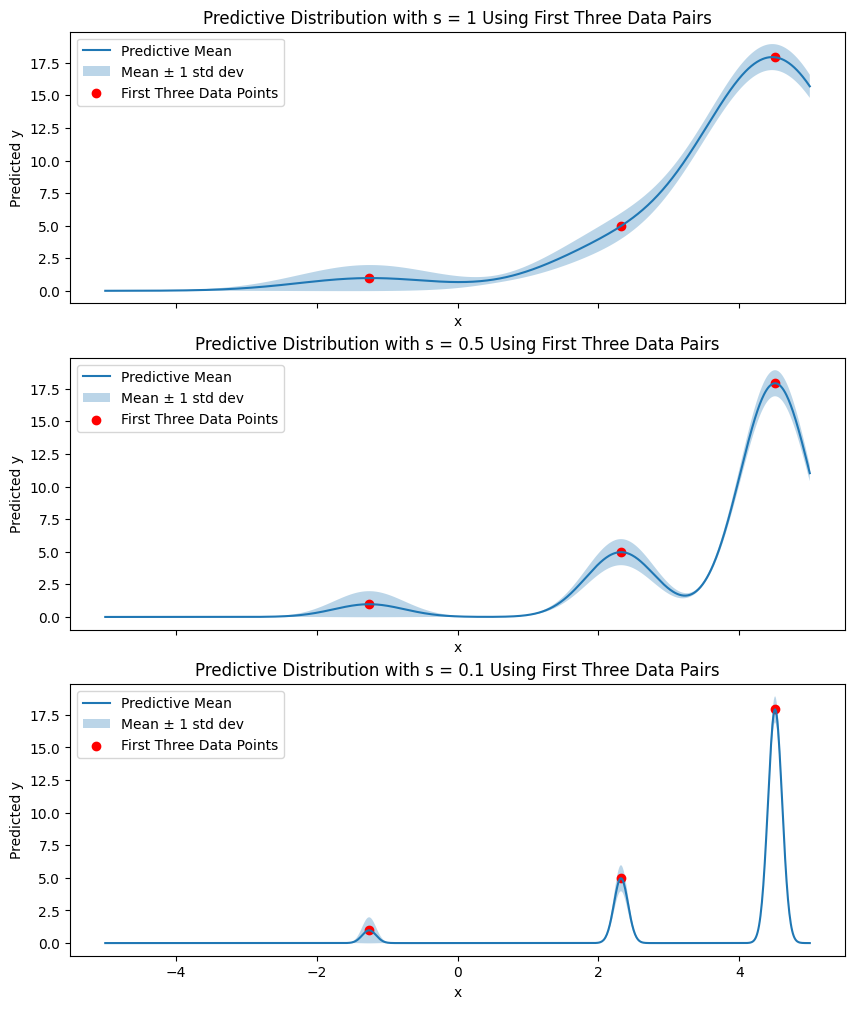

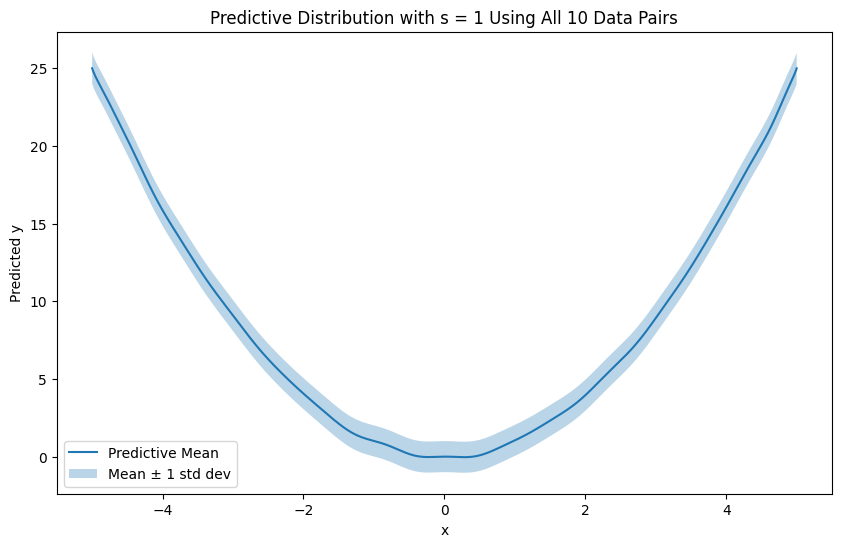

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters and synthetic data setup
n_samples = 5000
sigma_eta2 = 1
sigma_theta2 = 9

# Generate synthetic data
np.random.seed(42)
xn = np.random.uniform(-5, 5, n_samples)
etan = np.random.normal(0, np.sqrt(sigma_eta2), n_samples)
yn = xn**2 + etan

# Functions
def gaussian_basis(x, centers, s):
    return np.exp(-(x - centers)**2 / (2 * s**2))

s_values = [1, 0.5, 0.1]
x_range = np.arange(-5, 5.01, 0.01)  # Values of x to evaluate
x_n, y_n = xn, yn

x_n_subset = xn[:3]
y_n_subset = yn[:3]
fig, ax = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
i = 0

for s in s_values:
    # Calculate basis functions for a range of x values and for x_n
    Phi_subset = np.array([gaussian_basis(x_range, center, s) for center in x_n_subset]).T
    Phi_n_subset = np.array([gaussian_basis(x_n_subset, center, s) for center in x_n_subset]).T

    # Compute pseudo-inverse for estimating theta using only the first three pairs
    Phi_pseudo_inv_subset = np.linalg.pinv(Phi_n_subset)
    theta_hat_subset = Phi_pseudo_inv_subset.dot(y_n_subset)

    # Predictive mean and variance for the range of x values
    mean_y_subset = Phi_subset.dot(theta_hat_subset)
    var_y_subset = np.diag(Phi_subset.dot(Phi_pseudo_inv_subset).dot(Phi_subset.T)) * sigma_eta2

    # Plot the predictive distribution for x values

    std_deviation_subset = np.sqrt(var_y_subset)
    ax[i].plot(x_range, mean_y_subset, label='Predictive Mean')
    ax[i].fill_between(x_range, (mean_y_subset - std_deviation_subset),
                    (mean_y_subset + std_deviation_subset), alpha=0.3, label='Mean ± 1 std dev')
    ax[i].scatter(x_n_subset, y_n_subset, color='red', label='First Three Data Points')
    ax[i].set_title(f'Predictive Distribution with s = {s} Using First Three Data Pairs')
    ax[i].legend()
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('Predicted y')
    i = i + 1

plt.show()


# For all 10 samples
s = 1

# Calculate basis functions for a range of x values and for x_n
Phi_subset = np.array([gaussian_basis(x_range, center, s) for center in xn]).T
Phi_n_subset = np.array([gaussian_basis(xn, center, s) for center in xn]).T

# Compute pseudo-inverse for estimating theta using all pairs
Phi_pseudo_inv_subset = np.linalg.pinv(Phi_n_subset)
theta_hat_subset = Phi_pseudo_inv_subset.dot(yn)

# Predictive mean and variance for the range of x values
mean_y_subset = Phi_subset.dot(theta_hat_subset)
var_y_subset = np.diag(Phi_subset.dot(Phi_pseudo_inv_subset).dot(Phi_subset.T)) * sigma_eta2

# Plot the predictive distribution for x values
fig, ax = plt.subplots(figsize=(10, 6))
std_deviation_subset = np.sqrt(var_y_subset)
ax.plot(x_range, mean_y_subset, label='Predictive Mean')
ax.fill_between(x_range, (mean_y_subset - std_deviation_subset),
                (mean_y_subset + std_deviation_subset), alpha=0.3, label='Mean ± 1 std dev')
#ax.scatter(xn, yn, color='red', label='All 10 Data Points')
ax.set_title(f'Predictive Distribution with s = {s} Using All 10 Data Pairs')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('Predicted y')
plt.show()


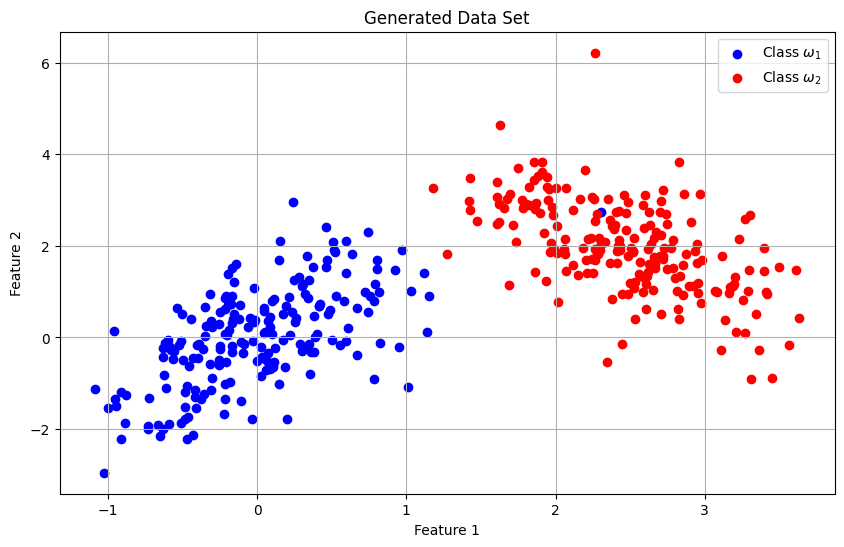

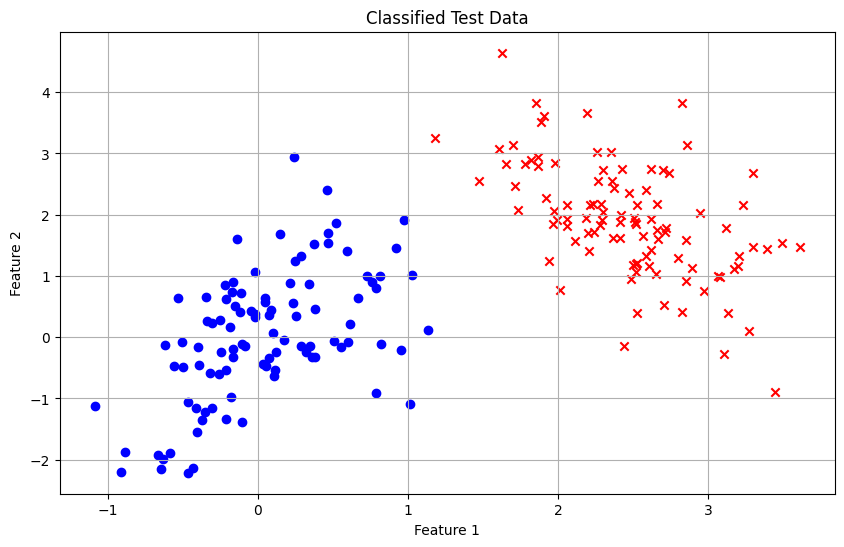

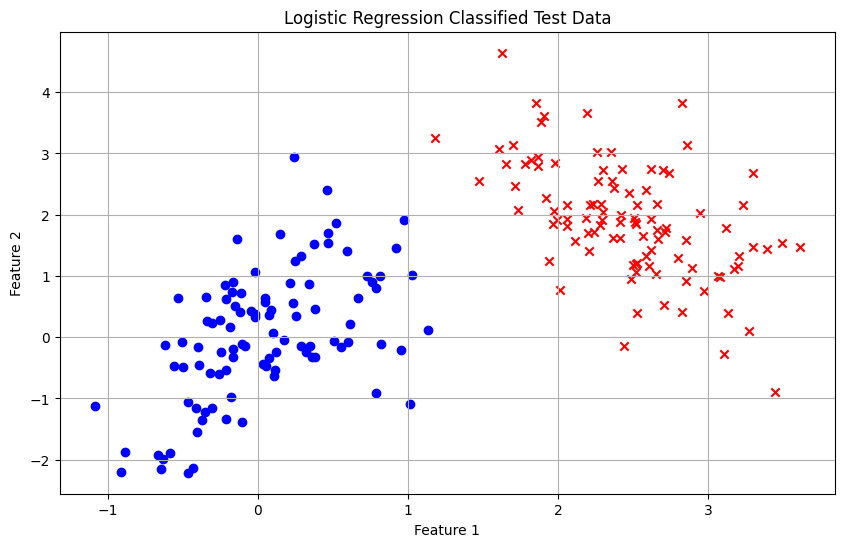

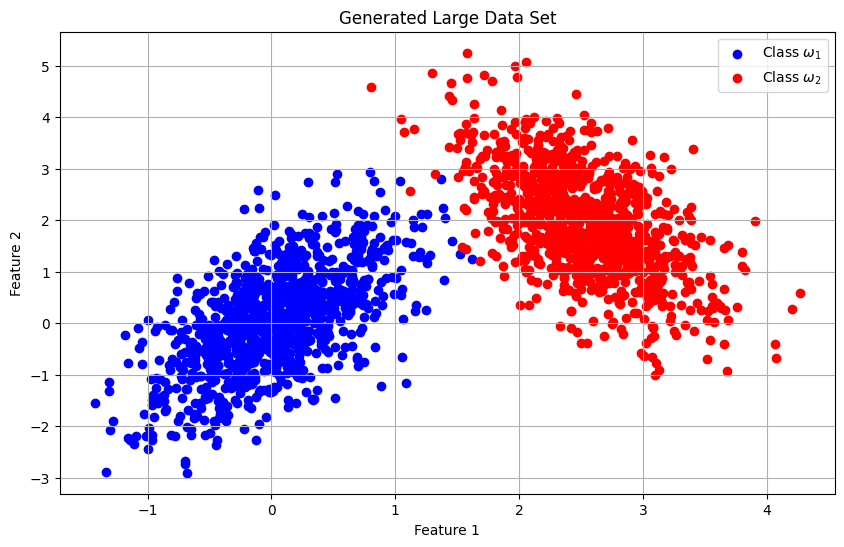

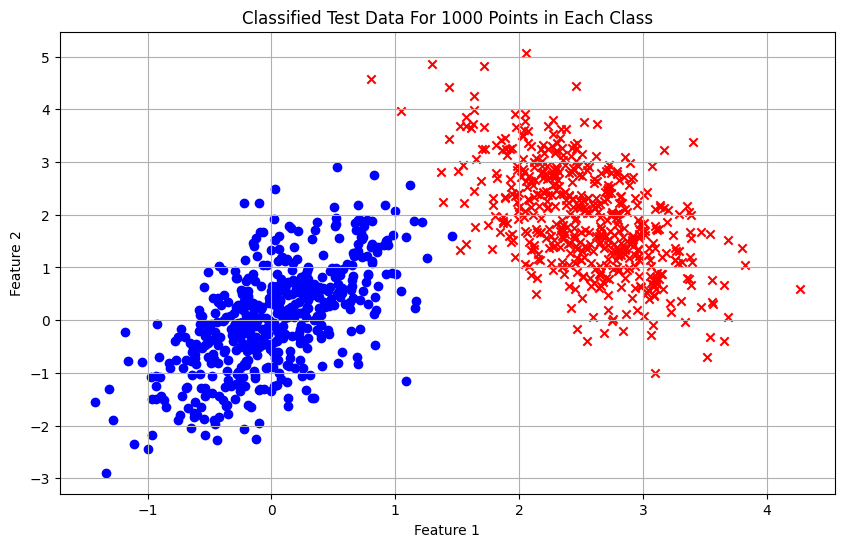

(array([[497,   3],
        [  1, 499]]),
 0.0040000000000000036)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from scipy.stats import multivariate_normal

# Given parameters
mu1 = np.array([0, 0])
sigma1 = np.array([[0.25, 0.3], [0.3, 1]])

mu2 = np.array([2.5, 2])
sigma2 = np.array([[0.25, -0.3], [-0.3, 1]])

# Generate dataset
np.random.seed(100)  # For reproducibility
samples_class1 = np.random.multivariate_normal(mu1, sigma1, 200)
samples_class2 = np.random.multivariate_normal(mu2, sigma2, 200)

# Plotting the dataset
plt.figure(figsize=(10, 6))
plt.scatter(samples_class1[:, 0], samples_class1[:, 1], color='blue', label='Class $\omega_1$')
plt.scatter(samples_class2[:, 0], samples_class2[:, 1], color='red', label='Class $\omega_2$')
plt.title("Generated Data Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


#2
# Splitting data into training and test sets
train_class1 = samples_class1[:100]
train_class2 = samples_class2[:100]
test_class1 = samples_class1[100:]
test_class2 = samples_class2[100:]

# Estimate mean and covariance from training data
estimated_mu1 = np.mean(train_class1, axis=0)
estimated_sigma1 = np.cov(train_class1, rowvar=False)

estimated_mu2 = np.mean(train_class2, axis=0)
estimated_sigma2 = np.cov(train_class2, rowvar=False)

# Combine test datasets
test_data = np.vstack((test_class1, test_class2))
true_labels = np.array([1]*100 + [2]*100)  # 1 for class ω1, 2 for class ω2

# Probability density functions using estimated parameters
pdf1 = multivariate_normal(mean=estimated_mu1, cov=estimated_sigma1)
pdf2 = multivariate_normal(mean=estimated_mu2, cov=estimated_sigma2)

# Applying Bayes' decision rule
likelihoods1 = pdf1.pdf(test_data)
likelihoods2 = pdf2.pdf(test_data)
predicted_labels = 1 + (likelihoods2 > likelihoods1).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
classification_error = 1 - np.trace(conf_matrix) / np.sum(conf_matrix)

# Plotting the test data with their assigned class
plt.figure(figsize=(10, 6))
for i, label in enumerate(predicted_labels):
    if label == 1:
        plt.scatter(test_data[i, 0], test_data[i, 1], color='blue', marker='o')
    else:
        plt.scatter(test_data[i, 0], test_data[i, 1], color='red', marker='x')

plt.title("Classified Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

conf_matrix, classification_error


#3
# Combine training data for logistic regression
X_train = np.vstack((train_class1, train_class2))
y_train = np.array([0]*100 + [1]*100)  # 0 for class ω1, 1 for class ω2

# Fitting logistic regression
logistic_model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

# Predict on the test data
logistic_predictions = logistic_model.predict(test_data)

# Compute confusion matrix for logistic regression
logistic_conf_matrix = confusion_matrix(true_labels - 1, logistic_predictions)
logistic_classification_error = 1 - np.trace(logistic_conf_matrix) / np.sum(logistic_conf_matrix)

# Plotting the test data with their assigned class by logistic regression
plt.figure(figsize=(10, 6))
for i, label in enumerate(logistic_predictions):
    if label == 0:
        plt.scatter(test_data[i, 0], test_data[i, 1], color='blue', marker='o')
    else:
        plt.scatter(test_data[i, 0], test_data[i, 1], color='red', marker='x')

plt.title("Logistic Regression Classified Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

logistic_conf_matrix, logistic_classification_error


#4
# Parameters for generating a larger dataset
n_samples = 1000

# Generate larger dataset
large_samples_class1 = np.random.multivariate_normal(mu1, sigma1, n_samples)
large_samples_class2 = np.random.multivariate_normal(mu2, sigma2, n_samples)

# Plotting the dataset
plt.figure(figsize=(10, 6))
plt.scatter(large_samples_class1[:, 0], large_samples_class1[:, 1], color='blue', label='Class $\omega_1$')
plt.scatter(large_samples_class2[:, 0], large_samples_class2[:, 1], color='red', label='Class $\omega_2$')
plt.title("Generated Large Data Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Splitting into training and test sets
large_train_class1 = large_samples_class1[:500]
large_train_class2 = large_samples_class2[:500]
large_test_class1 = large_samples_class1[500:]
large_test_class2 = large_samples_class2[500:]

# Estimate mean and covariance from training data
large_estimated_mu1 = np.mean(large_train_class1, axis=0)
large_estimated_sigma1 = np.cov(large_train_class1, rowvar=False)

large_estimated_mu2 = np.mean(large_train_class2, axis=0)
large_estimated_sigma2 = np.cov(large_train_class2, rowvar=False)

# Combine test datasets
large_test_data = np.vstack((large_test_class1, large_test_class2))
large_true_labels = np.array([1]*500 + [2]*500)  # 1 for class ω1, 2 for class ω2

# Probability density functions using estimated parameters
pdf1 = multivariate_normal(mean=large_estimated_mu1, cov=large_estimated_sigma1)
pdf2 = multivariate_normal(mean=large_estimated_mu2, cov=large_estimated_sigma2)

# Applying Bayes' decision rule
likelihoods1 = pdf1.pdf(large_test_data)
likelihoods2 = pdf2.pdf(large_test_data)
large_predicted_labels = 1 + (likelihoods2 > likelihoods1).astype(int)

# Compute confusion matrix
lconf_matrix = confusion_matrix(large_true_labels, large_predicted_labels)
lclassification_error = 1 - np.trace(lconf_matrix) / np.sum(lconf_matrix)

# Plotting the test data with their assigned class
plt.figure(figsize=(10, 6))
for i, label in enumerate(large_predicted_labels):
    if label == 1:
        plt.scatter(large_test_data[i, 0], large_test_data[i, 1], color='blue', marker='o')
    else:
        plt.scatter(large_test_data[i, 0], large_test_data[i, 1], color='red', marker='x')

plt.title("Classified Test Data For 1000 Points in Each Class")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

lconf_matrix, lclassification_error


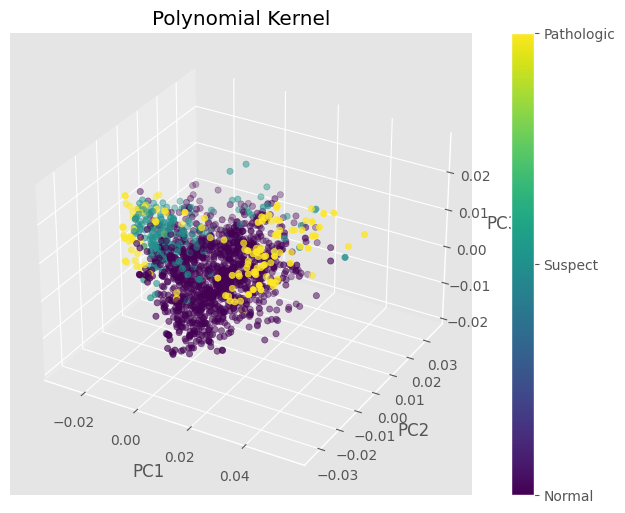

--------------------------------------------------------------------------------
RandomForestClassifier Confusion Matrix


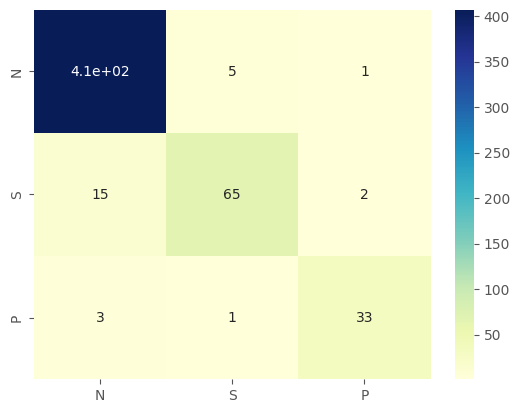

--------------------------------------------------------------------------------
RandomForestClassifier Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       413
         2.0       0.92      0.79      0.85        82
         3.0       0.92      0.89      0.90        37

    accuracy                           0.95       532
   macro avg       0.93      0.89      0.91       532
weighted avg       0.95      0.95      0.95       532

--------------------------------------------------------------------------------
RandomForestClassifier Accuracy 94.92 %
--------------------------------------------------------------------------------
RidgeClassifier Confusion Matrix


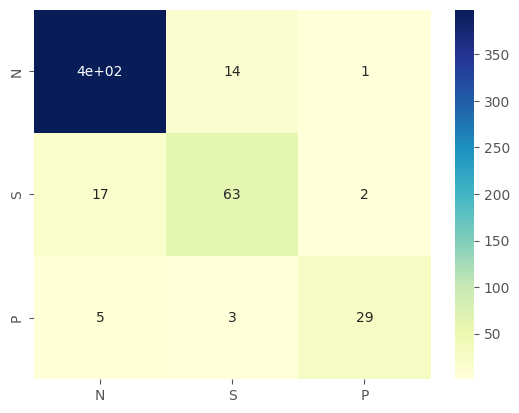

--------------------------------------------------------------------------------
RidgeClassifier Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       413
         2.0       0.79      0.77      0.78        82
         3.0       0.91      0.78      0.84        37

    accuracy                           0.92       532
   macro avg       0.88      0.84      0.86       532
weighted avg       0.92      0.92      0.92       532

--------------------------------------------------------------------------------
RidgeClassifier Accuracy 92.11 %


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data loading
dataset = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/ESE 588/input/CTG.xls', sheet_name=1, skiprows=1) # Get the data
dataset.head()

# Data preprocessing
dataset = dataset.dropna(axis=1, how='all') # Got rid of empty columns
dataset = dataset.dropna(axis=0, how='any') # Three rows were REALLY missing information
dataset = dataset.drop(['b','e','AC','FM','UC','DL','DS','DP','DR','A','B','C','D','E','AD','DE','LD','FS','SUSP'], axis=1) # No information from such colum

dataset

# Preparing our variables
X = dataset.iloc[:,:-2].values # We got rid of the class value to focus on the FHR diagnosis
y = dataset.iloc[:,-1].values # Containing the FHR diagnosis

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import KernelPCA

names = [
         'Polynomial Kernel'
         ]

classifiers = [
    KernelPCA(n_components = 3, kernel = 'poly', gamma= 0.00001)
]

models=zip(names,classifiers)

for name, kpca in models:
    X_PCA = kpca.fit_transform(X_train)

    from mpl_toolkits.mplot3d import axes3d
    from matplotlib import style
    style.use('ggplot')

    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(111, projection='3d')
    loc = [1,2,3]
    classes = ['Normal','Suspect','Pathologic']
    x3d = X_PCA[:,0]
    y3d = X_PCA[:,1]
    z3d = X_PCA[:,2]

    plot = ax1.scatter(x3d, y3d, z3d, c=y_train, cmap="viridis")
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    cb = plt.colorbar(plot)
    cb.set_ticks(loc)
    cb.set_ticklabels(classes)

    plt.title(name)
    plt.show()


# Importing all the classifiers fitting to the problem from sklearn
from sklearn.linear_model import OrthogonalMatchingPursuit,RANSACRegressor,LogisticRegression,ElasticNetCV,HuberRegressor, Ridge, Lasso,LassoCV,Lars,BayesianRidge,SGDClassifier,LogisticRegressionCV,RidgeClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Turning our problem into a non linear problem
n_col=36
poly = PolynomialFeatures(2)
X_train=poly.fit_transform(X_train)
X_test=poly.fit_transform(X_test)


names = [
         'RandomForestClassifier',
         'RidgeClassifier'
         ]

classifiers = [
    RandomForestClassifier(n_estimators = 200),
    RidgeClassifier(),
]
correction= [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

models=zip(names,classifiers,correction)

for name, clf,correct in models:
    regr=clf.fit(X_train,y_train)
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

    # Confusion Matrix
    print('--'*40)
    print(name, 'Confusion Matrix')
    conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) )
    label = ["N","S","P"]
    sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
    plt.show()

    print('--'*40)

    # Classification Report
    print(name,'Classification Report')
    classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
    print(classif)


    # Accuracy
    print('--'*40)
    logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
    print(name, 'Accuracy', logreg_accuracy,'%')